In [37]:
import operator
import numpy as np
import os
from csv import DictReader

datoteke = os.listdir("podatki/")
obcine = []
for dat in datoteke:
    if "Podatki" in dat and "2020" not in dat:
        neki = DictReader(open('podatki/' + dat, 'rt', encoding='ANSI'), delimiter=';')
        for i in neki:
            obcine.append([i["C1.3-Obcina uporabnika vozila (opis)"], i["Status vozila (opis)"], i["C-Ali je uporabnik pravna ali fizicna oseba"]])
obcine1 = np.array(obcine)

In [38]:
len(obcine1[obcine1[:,0] == "Ljubljana"])

154514

In [39]:
stevilo_na_obcino = dict()
for i in obcine:
    if i[1] != "odjavljeno":
        if i[0] not in stevilo_na_obcino:
            stevilo_na_obcino[i[0]] = 0
        stevilo_na_obcino[i[0]] += 1

In [40]:
stevilo_na_obcino = sorted(stevilo_na_obcino.items(),key=operator.itemgetter(1),reverse=True)
stevilo_na_obcino[0]

('Ljubljana', 132185)

In [41]:
obcine = np.array(stevilo_na_obcino[:20])
imena = obcine[:,0]
stevilo = obcine[:,1].astype(int)

In [42]:
st_lj = stevilo[0]

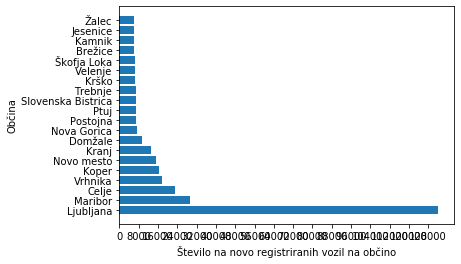

In [43]:
import matplotlib.pyplot as plt
plt.xlabel("Število na novo registriranih vozil na občino")
plt.ylabel("Občina")
plt.xscale("linear")
plt.barh(imena, stevilo)
plt.xticks(np.arange(0,stevilo[0]+500, 8000))
plt.show()

In [44]:
samo_ljubljana = obcine1[obcine1[:, 2] == "P"]
samo_ljubljana = samo_ljubljana[samo_ljubljana[:,0] == "Ljubljana"]
print("Število novih poslovnih avtomobilov v Ljubljani:", len(samo_ljubljana))

Število novih poslovnih avtomobilov v Ljubljani: 114918


In [45]:
print("Število novih fizičnih avtomobilov v Ljubljani:", st_lj - len(samo_ljubljana))

Število novih fizičnih avtomobilov v Ljubljani: 17267


In [46]:
print("Razmerje poslovnih avtomobilov:", str(int((len(samo_ljubljana)/(st_lj)) * 100)) + "%")

Razmerje poslovnih avtomobilov: 86%


In [47]:
brez_poslovnih = dict()
for i in obcine1:
    if i[1] != "odjavljeno" and i[2] != "P":
        if i[0] not in brez_poslovnih:
            brez_poslovnih[i[0]] = 0
        brez_poslovnih[i[0]] += 1
stevilo_na_obcino_brez_poslovnih = sorted(brez_poslovnih.items(),key=operator.itemgetter(1),reverse=True)
obcine2 = np.array(stevilo_na_obcino_brez_poslovnih[:20])
imena = obcine2[:,0]
stevilo = obcine2[:,1].astype(int)

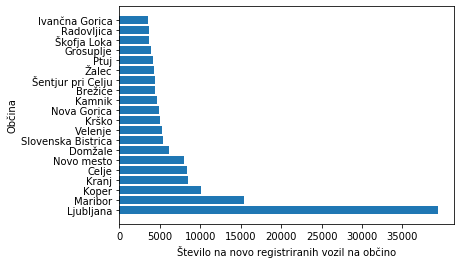

In [48]:
plt.xlabel("Število na novo registriranih vozil na občino")
plt.ylabel("Občina")
plt.xscale("linear")
plt.barh(imena, stevilo)
plt.xticks(np.arange(0,stevilo[0]+100, 5000))
plt.show()